# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Class model definition

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


def cross_entropy(Y_true, predictions):
  filter_true_1 = Y_true == 1
  return -1 * ( np.sum(np.log(predictions[filter_true_1])) + np.sum(np.log(1 - predictions[~filter_true_1])) )


class BinaryLogisticRegressionModel(object):
  def __init__(self):
    pass

  def _get_loss_functions(self, regularization, alfa=0):
    L = lambda  X, Y, w: cross_entropy(Y, sigmoid(X.dot(w))) / len(Y)
    dL = lambda  X, Y, w: -1 * X.T.dot(Y - sigmoid(X.dot(w))) / len(Y)
    cost, dcost = L, dL

    if (regularization == 'L1'):
      cost = lambda  X, Y, w: L(X, Y, w) + alfa * (np.abs(w)).sum()
      dcost = lambda  X, Y, w: dL(X, Y, w) + 2 * alfa * np.sign(w)
      print('Cost with L1 regularization will be used')
    elif (regularization == 'L2'):
      cost = lambda  X, Y, w: L(X, Y, w) + alfa * w.dot(w)
      dcost = lambda  X, Y, w: dL(X, Y, w) + 2 * alfa * w
      print('Cost with L2 regularization will be used')
    else:
      print('Cost with no regularization will be used')

    return cost, dcost
        

  def _gradient_descent(self, X, Y, f, df, x0, step_size, numer_of_steps, treshold=None, should_trace_steps=None, should_plot=False):
    x = x0
  
    if (should_trace_steps is not None):
      print(f'Step 0. Starting point is {x0} and initial function value is {f(X, Y, x0)}')
    
    if (should_plot):
      steps_hist = [0]
      f_hist = [f(X, Y, x0)]

    for step in range(numer_of_steps):
      x_new = x - step_size * df(X, Y, x)
      f_new = f(X, Y, x_new)
      if (should_trace_steps is not None):
        if ((step+1) % should_trace_steps == 0):
          print(f'Step {step+1}. At {x_new} function value is {f_new}')
      
      if (should_plot):
        steps_hist.append(step+1)
        f_hist.append(f_new)
      
      if (treshold is not None):
        change = np.abs(f_new - f(X, Y, x))
        if (change < treshold):
          print(f'Early stop after {step+1} steps because change in step {change} is smaller than treshold {treshold}')
          x = x_new 
          break
    
      x = x_new 

    if (should_trace_steps is not None):
      print(f'Loop finished with trained parameters at {x} and function value is {f(X, Y, x)}')
    
    if (should_plot):
      plt.figure(figsize=(20,10))
      plt.plot(steps_hist, f_hist);
      plt.title('Cost fuction history');

    return x


  def fit(self, X, Y, learning_rate=0.1, epochs_num=12000, treshold=None, regularization=None, alfa=0.1, trace_logs=True, trace_epochs_num=None, show_plot=False, add_bias=False, init_weigths=None):
    N, D = X.shape

    if (add_bias == True):
      X = np.hstack([np.ones((X.shape[0],1)), X])
      N, D = X.shape
      if (init_weigths is not None):
        w0 = np.concatenate(([0], init_weigths))
        print(w0)
      else:
        w0 = np.random.randn(D) / np.sqrt(D)
        w0[0] = 0
    else:
      if (init_weigths is None):
        w0 = np.random.randn(D) / np.sqrt(D)
      else:
        w0 = init_weigths

    L, dL = self._get_loss_functions(regularization, alfa)

    if (trace_logs == True):
      print('Initial value for trained weigths:', w0)
    self.w = self._gradient_descent(X, Y, L, dL, x0=w0, step_size=learning_rate, numer_of_steps=epochs_num, treshold=treshold, should_trace_steps=trace_epochs_num, should_plot=show_plot)

    if (trace_logs == True):
      y_pred_gd = self.predict(X)
      L_gd = cross_entropy(Y, y_pred_gd)
      print('Cross Enthropy loss for W weights calculated bu gradient descent:', L_gd)
    
    return self.w
    

  def predict(self, X):
      return sigmoid(X.dot(self.w))

# Simple data separabable by straight line

In [ ]:
N = 100
D = 2

X = np.random.randn(N, D)
X[:N//2] -= 2
X[N//2:] += 2

y = np.zeros(N)
y[N//2:] = 1

w0 = np.random.randn(D)

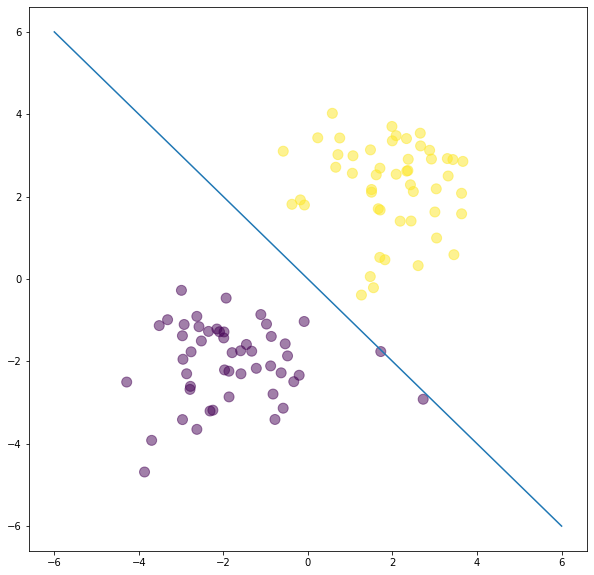

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c=y, s=100, alpha=0.5);

x_axis = np.linspace(-6, 6, 1000)
y_axis = -1 * x_axis
plt.plot(x_axis, y_axis);

[0.         0.30421358 0.04932625]
Cost with no regularization will be used
Initial value for trained weigths: [0.         0.30421358 0.04932625]
Step 0. Starting point is [0.         0.30421358 0.04932625] and initial function value is 0.4262946764646437
Step 100. At [-0.05392433  1.00220219  1.26248495] function value is 0.03753041902226654
Step 200. At [-0.05877631  1.1463118   1.58434736] function value is 0.02478229857659742
Step 300. At [-0.05155508  1.243449    1.78944563] function value is 0.019587457844039716
Step 400. At [-0.03991561  1.32013818  1.94291965] function value is 0.01662030610896797
Step 500. At [-0.02651562  1.38456661  2.06698204] function value is 0.01464459260124743
Step 600. At [-0.01248369  1.44053548  2.17195649] function value is 0.013208224217935332
Step 700. At [1.65074787e-03 1.49020466e+00 2.26349291e+00] function value is 0.012102970032513123
Step 800. At [0.01562751 1.53495415 2.34502272] function value is 0.01121813309239299
Step 900. At [0.0293182

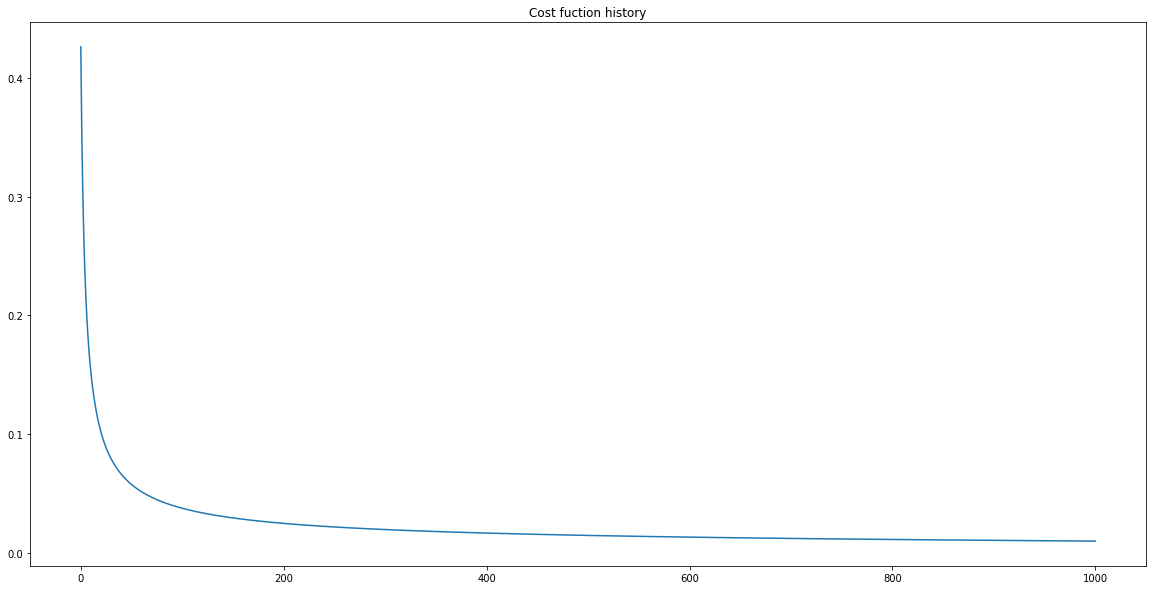

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(X, y, learning_rate=0.1, epochs_num=1000, treshold=None, regularization=None, trace_epochs_num=100, show_plot=True, add_bias=True, init_weigths=w0.copy())

[0.         0.30421358 0.04932625]
Cost with L1 regularization will be used
Initial value for trained weigths: [0.         0.30421358 0.04932625]
Step 0. Starting point is [0.         0.30421358 0.04932625] and initial function value is 0.461648659152431
Step 100. At [-1.41098843e-04  4.55967103e-01  3.35357524e-01] function value is 0.2978573024176815
Step 200. At [1.86411212e-04 4.79164306e-01 4.50086199e-01] function value is 0.26970215743089976
Step 300. At [0.00094945 0.47225872 0.51459088] function value is 0.2597274548642976
Step 400. At [-0.00176008  0.45621805  0.55676366] function value is 0.2551117233222364
Step 500. At [-1.90569248e-05  4.38134643e-01  5.87023753e-01] function value is 0.2524899775544754
Step 600. At [-0.00191473  0.42073373  0.61013743] function value is 0.25125089627095964
Step 700. At [4.88175022e-04 4.05018871e-01 6.28547951e-01] function value is 0.2502747926432865
Step 800. At [-0.00085887  0.39125417  0.64361811] function value is 0.2497515360919435


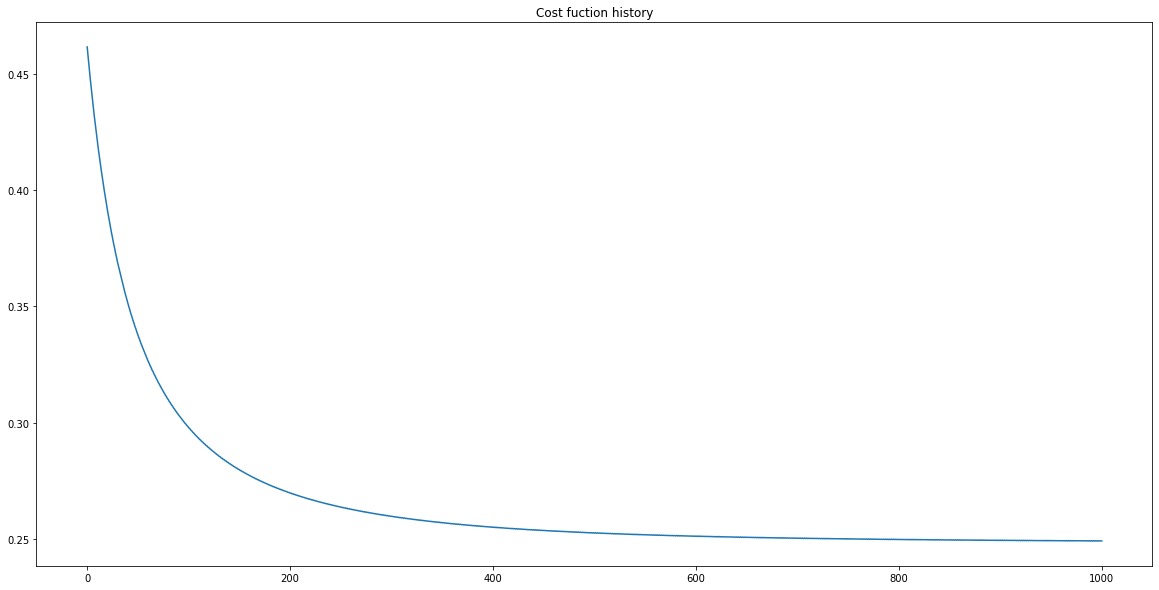

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(X, y, learning_rate=0.01, epochs_num=1000, treshold=None, regularization='L1', alfa=0.1, trace_epochs_num=100, show_plot=True, add_bias=True, init_weigths=w0.copy())

[0.         0.30421358 0.04932625]
Cost with L2 regularization will be used
Initial value for trained weigths: [0.         0.30421358 0.04932625]
Step 0. Starting point is [0.         0.30421358 0.04932625] and initial function value is 0.4357925744431639
Step 100. At [-0.00922828  0.51946109  0.42211809] function value is 0.22143656742780216
Step 200. At [-0.01659122  0.56982169  0.5611639 ] function value is 0.19836598807227754
Step 300. At [-0.02138705  0.5830841   0.63198154] function value is 0.19298386553019511
Step 400. At [-0.02446745  0.58405607  0.67203652] function value is 0.19133116686838147
Step 500. At [-0.02643747  0.58091458  0.69597657] function value is 0.1907337022284013
Step 600. At [-0.02768908  0.57679084  0.71081732] function value is 0.19049145351719068
Step 700. At [-0.02847554  0.57288756  0.72027448] function value is 0.19038491112321693
Step 800. At [-0.02896137  0.56960263  0.72643627] function value is 0.19033541288530956
Step 900. At [-0.02925388  0.5669

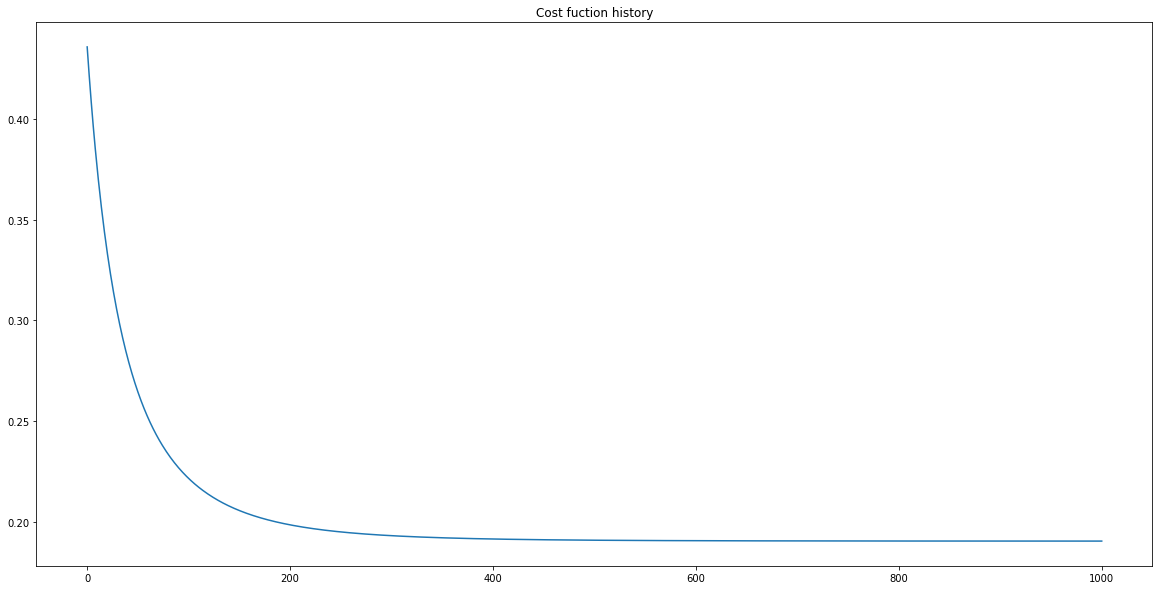

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(X, y, learning_rate=0.01, epochs_num=1000, treshold=None, regularization='L2', alfa=0.1, trace_epochs_num=100, show_plot=True, add_bias=True, init_weigths=w0.copy())

# N and D are big

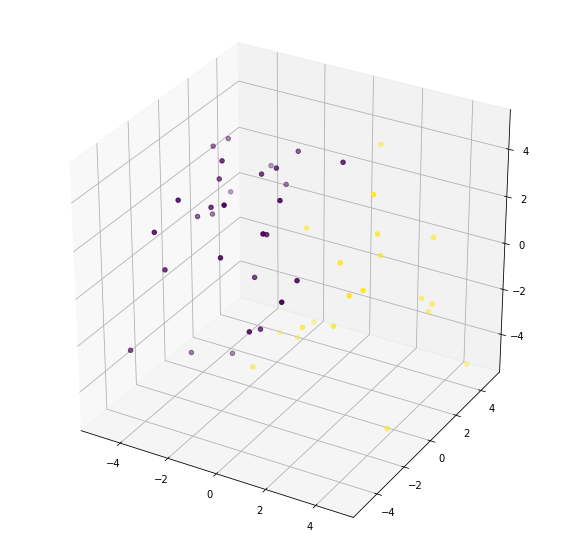

In [ ]:
N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10
# X = (np.random.randn(N, D) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# generate Y - add noise with variance 0.5
Y = np.round(sigmoid(X.dot(true_w) + np.random.randn(N)*0.5))

# let's plot the data to see what it looks like
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)
plt.show()

w0 = np.random.randn(D) / np.sqrt(D)

[ 0.          0.0633661  -0.23588904  0.1394659   0.15824438 -0.19608879
 -0.02207808  0.29596781  0.06359749 -0.1246546  -0.20024203  0.03506098
  0.01990907  0.20148501  0.05858474  0.11928016  0.1257114   0.23434097
 -0.05798429 -0.14248125 -0.14424374 -0.21942776 -0.03495785 -0.12970269
  0.11117816  0.06581042 -0.03648601  0.24206527  0.21654509 -0.0181638
  0.10765106 -0.0450462  -0.10240453 -0.12887211  0.37775101  0.01220709
  0.00320658 -0.02057114  0.12893041 -0.08846838  0.16332353 -0.05761996
  0.06622476 -0.00760517  0.18831916  0.11526632 -0.25734036 -0.24079919
  0.06456298 -0.09129486  0.07525424]
Cost with no regularization will be used
Initial value for trained weigths: [ 0.          0.0633661  -0.23588904  0.1394659   0.15824438 -0.19608879
 -0.02207808  0.29596781  0.06359749 -0.1246546  -0.20024203  0.03506098
  0.01990907  0.20148501  0.05858474  0.11928016  0.1257114   0.23434097
 -0.05798429 -0.14248125 -0.14424374 -0.21942776 -0.03495785 -0.12970269
  0.1111781

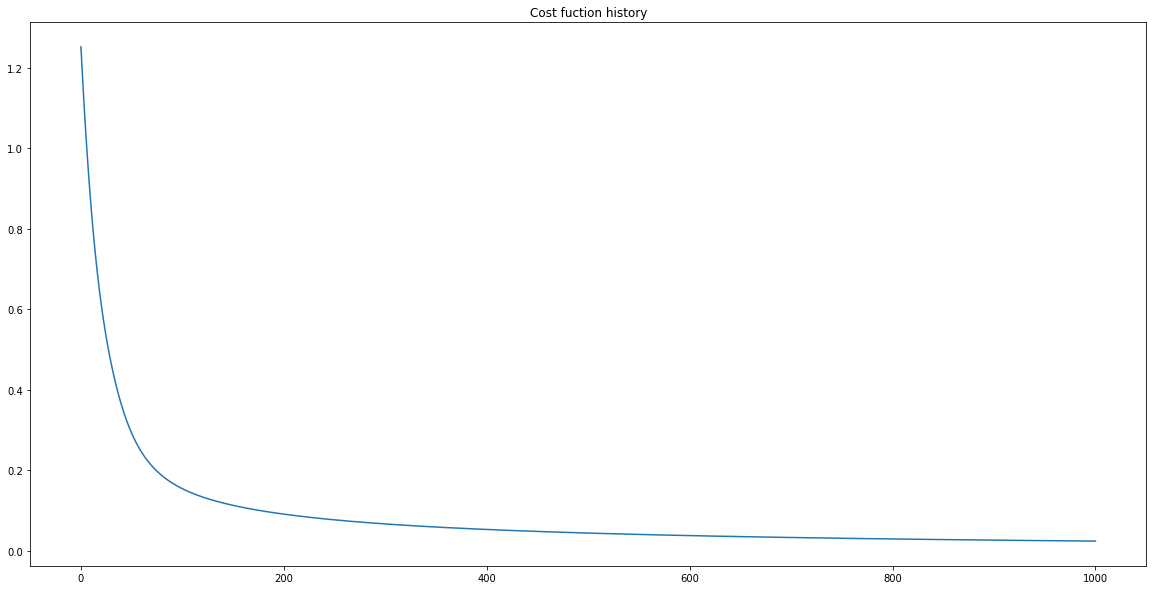

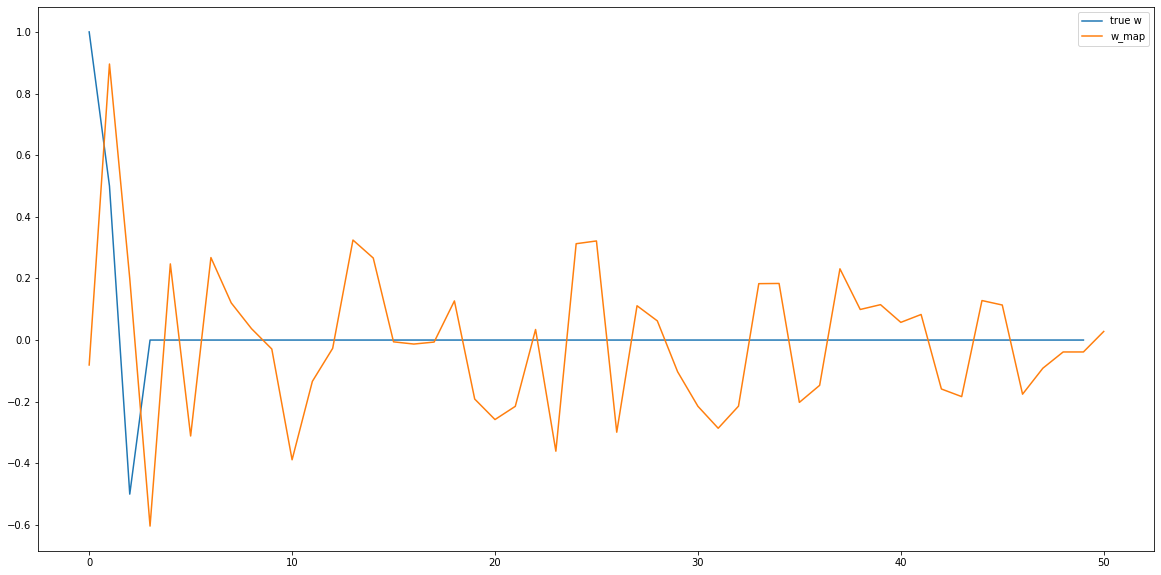

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(X, Y, learning_rate=0.01, epochs_num=1000, treshold=None, regularization=None, alfa=0.1, trace_epochs_num=None, show_plot=True, add_bias=True, init_weigths=w0.copy())

# plot our w vs true w
plt.figure(figsize=(20,10))
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

Cost with L1 regularization will be used
Initial value for trained weigths: [ 0.0633661  -0.23588904  0.1394659   0.15824438 -0.19608879 -0.02207808
  0.29596781  0.06359749 -0.1246546  -0.20024203  0.03506098  0.01990907
  0.20148501  0.05858474  0.11928016  0.1257114   0.23434097 -0.05798429
 -0.14248125 -0.14424374 -0.21942776 -0.03495785 -0.12970269  0.11117816
  0.06581042 -0.03648601  0.24206527  0.21654509 -0.0181638   0.10765106
 -0.0450462  -0.10240453 -0.12887211  0.37775101  0.01220709  0.00320658
 -0.02057114  0.12893041 -0.08846838  0.16332353 -0.05761996  0.06622476
 -0.00760517  0.18831916  0.11526632 -0.25734036 -0.24079919  0.06456298
 -0.09129486  0.07525424]
Cross Enthropy loss for W weights calculated bu gradient descent: 13.145028277929612


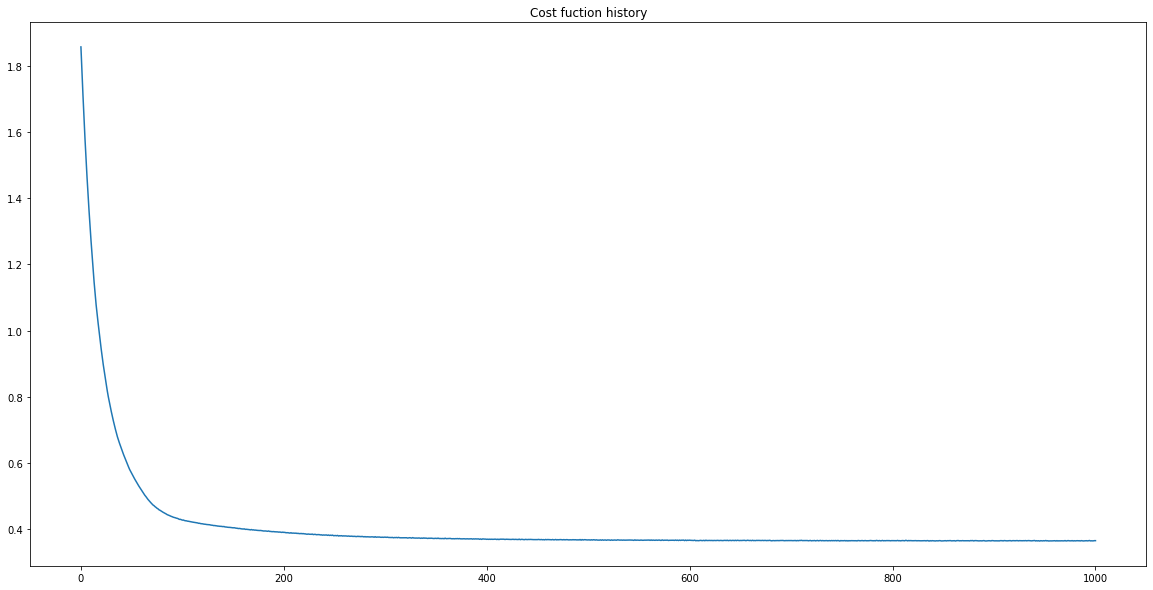

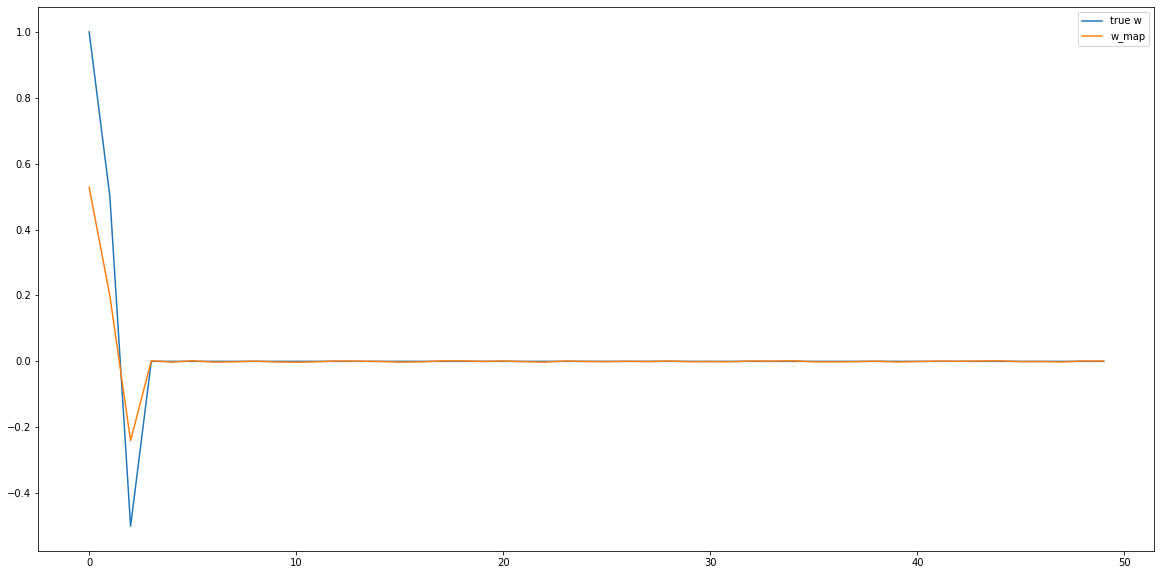

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(X, Y, learning_rate=0.01, epochs_num=1000, treshold=None, regularization='L1', alfa=0.1, trace_epochs_num=None, show_plot=True, add_bias=False, init_weigths=w0.copy())

# plot our w vs true w
plt.figure(figsize=(20,10))
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

Cost with L2 regularization will be used
Initial value for trained weigths: [ 0.0633661  -0.23588904  0.1394659   0.15824438 -0.19608879 -0.02207808
  0.29596781  0.06359749 -0.1246546  -0.20024203  0.03506098  0.01990907
  0.20148501  0.05858474  0.11928016  0.1257114   0.23434097 -0.05798429
 -0.14248125 -0.14424374 -0.21942776 -0.03495785 -0.12970269  0.11117816
  0.06581042 -0.03648601  0.24206527  0.21654509 -0.0181638   0.10765106
 -0.0450462  -0.10240453 -0.12887211  0.37775101  0.01220709  0.00320658
 -0.02057114  0.12893041 -0.08846838  0.16332353 -0.05761996  0.06622476
 -0.00760517  0.18831916  0.11526632 -0.25734036 -0.24079919  0.06456298
 -0.09129486  0.07525424]
Cross Enthropy loss for W weights calculated bu gradient descent: 4.485953584484323


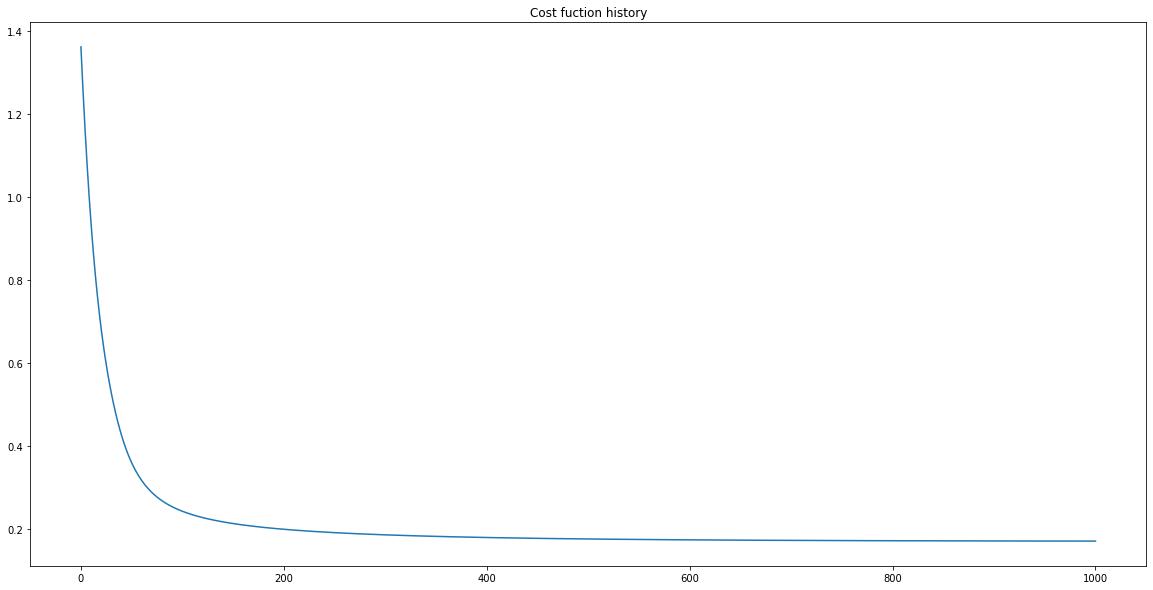

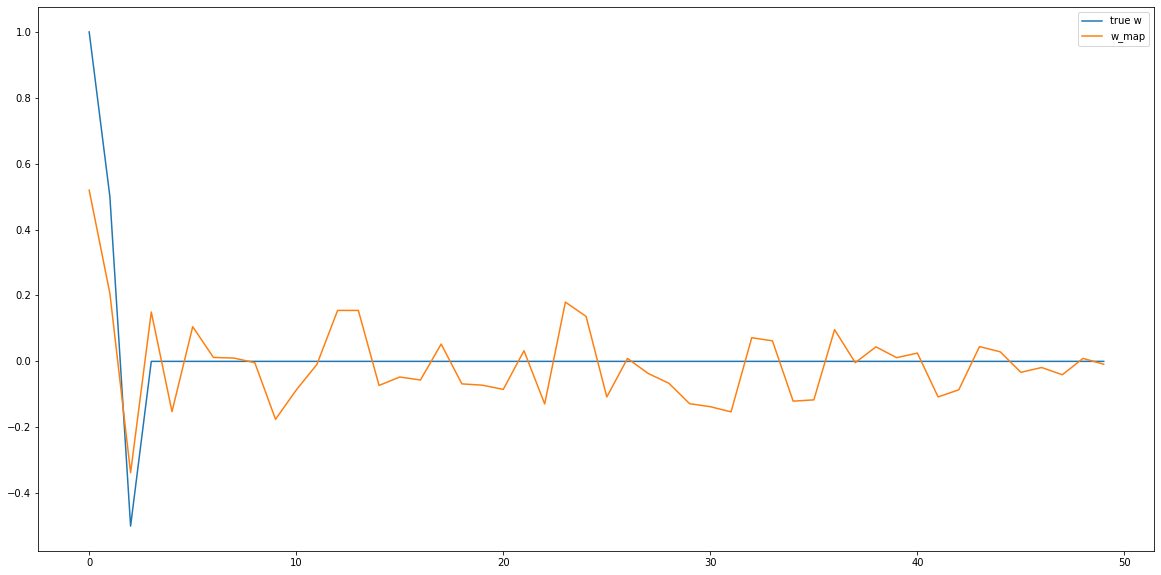

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(X, Y, learning_rate=0.01, epochs_num=1000, treshold=None, regularization='L2', alfa=0.1, trace_epochs_num=None, show_plot=True, add_bias=False, init_weigths=w0.copy())

# plot our w vs true w
plt.figure(figsize=(20,10))
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

# Donut data

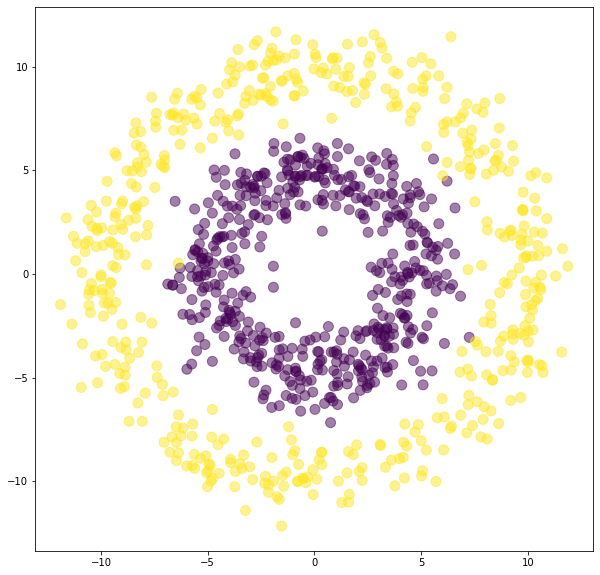

In [ ]:
N = 1000
D = 2

R_inner = 5
R_outer = 10

half = N//2
Y = np.array([0]*half + [1]*(N-half))

radius = 2 * np.pi * np.random.random(size=N)
r = np.random.randn(N)
r[:half] += R_inner
r[half:] += R_outer

donut = np.vstack([r * np.cos(radius), r * np.sin(radius)]).T

plt.figure(figsize=(10,10))
plt.scatter(donut[:,0], donut[:,1], c=Y, s=100, alpha=0.5);

In [ ]:
radius = []
for r in donut:
  radius.append(np.sqrt(r.dot(r)))

r = np.array(radius).reshape(-1,1)

Xb = np.hstack([np.ones((N,1)), r, donut])

w0 = np.random.rand(D+2)

Cost with no regularization will be used
Initial value for trained weigths: [0.15583256 0.13226647 0.73303354 0.55531998]
Step 0. Starting point is [0.15583256 0.13226647 0.73303354 0.55531998] and initial function value is 2.0782005056789994
Step 1000. At [-6.25743644  0.87948772 -0.0071761   0.01289226] function value is 0.14864580236259556
Step 2000. At [-8.50951834  1.1744665  -0.0099119   0.01547662] function value is 0.09554738878847208
Step 3000. At [-9.92741472  1.36085456 -0.01190918  0.01758798] function value is 0.0748842659504262
Step 4000. At [-10.97751223   1.49913263  -0.01355044   0.01933034] function value is 0.06360773874883054
Step 5000. At [-11.81795544   1.60992359  -0.0149763    0.02081351] function value is 0.05639924966813649
Loop finished with trained parameters at [-11.81795544   1.60992359  -0.0149763    0.02081351] and function value is 0.05639924966813649
Cross Enthropy loss for W weights calculated bu gradient descent: 56.39924966813649


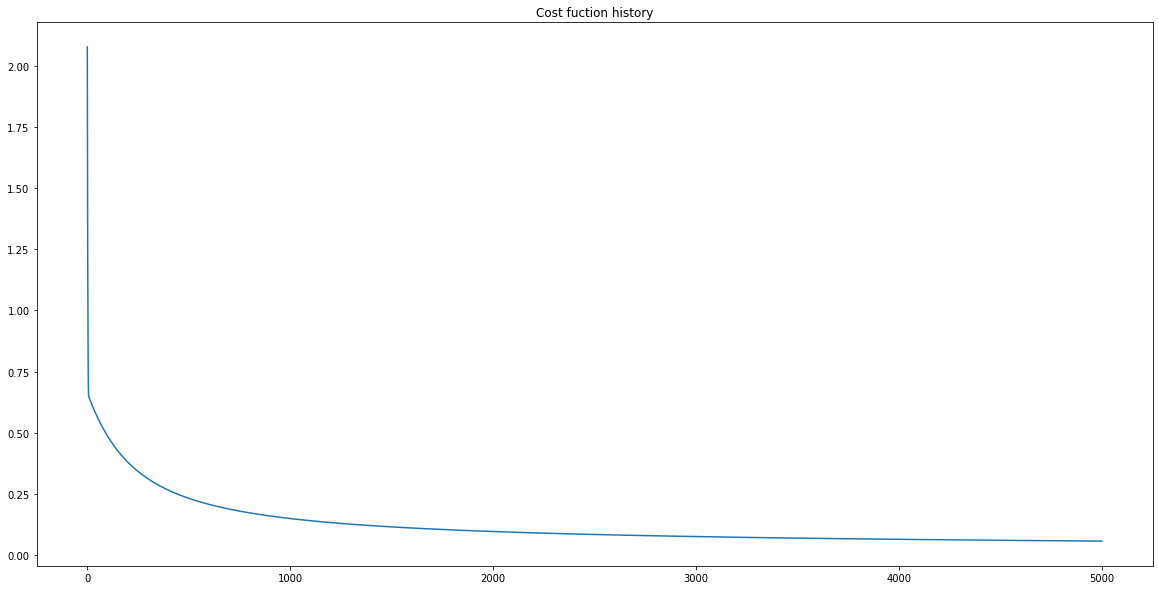

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(Xb, Y, learning_rate=0.1, epochs_num=5000, treshold=None, regularization=None, alfa=100, trace_epochs_num=1000, show_plot=True, add_bias=False, init_weigths=w0.copy())

Cost with L1 regularization will be used
Initial value for trained weigths: [0.15583256 0.13226647 0.73303354 0.55531998]
Step 0. Starting point is [0.15583256 0.13226647 0.73303354 0.55531998] and initial function value is 2.079776958225368
Step 1000. At [-6.12832715  0.86234608 -0.00634699  0.01212438] function value is 0.1597722683595912
Step 2000. At [-8.26692488  1.14219373 -0.00858325  0.01419312] function value is 0.10931999338074605
Step 3000. At [-9.57121171  1.31344847 -0.01012088  0.01583612] function value is 0.09032467138086626
Step 4000. At [-10.5078929    1.43662667  -0.01132267   0.01714287] function value is 0.08027861754098652
Step 5000. At [-11.23538708   1.53238514  -0.01232076   0.01821471] function value is 0.07404690524512342
Loop finished with trained parameters at [-11.23538708   1.53238514  -0.01232076   0.01821471] and function value is 0.07404690524512342
Cross Enthropy loss for W weights calculated bu gradient descent: 61.24859754551406


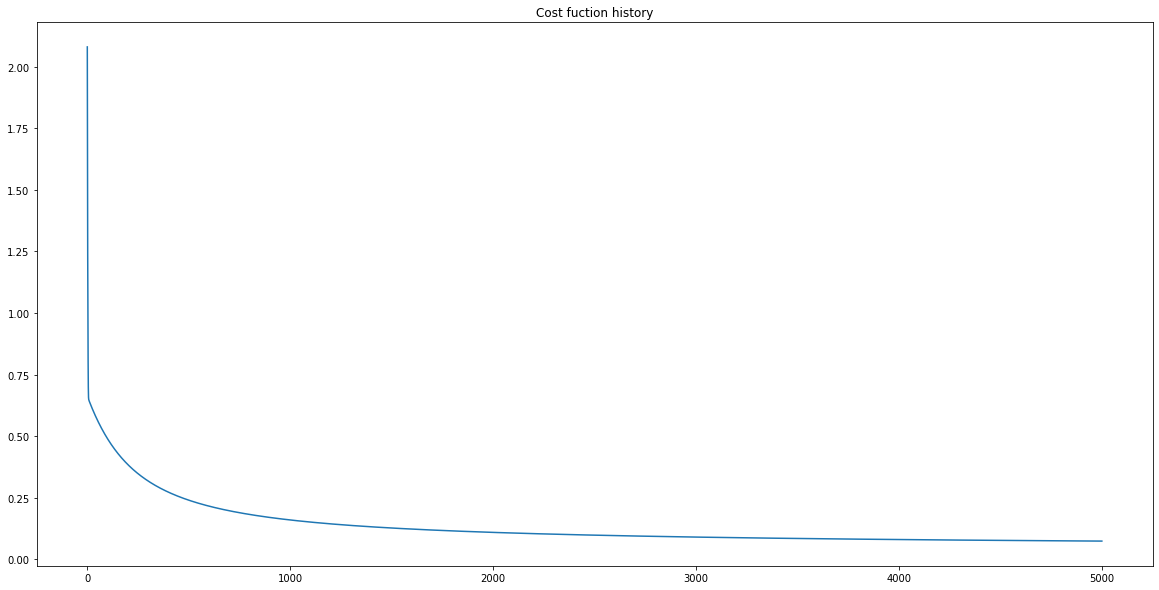

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(Xb, Y, learning_rate=0.1, epochs_num=5000, treshold=None, regularization='L1', alfa=0.001, trace_epochs_num=1000, show_plot=True, add_bias=False, init_weigths=w0.copy())

Cost with L2 regularization will be used
Initial value for trained weigths: [0.15583256 0.13226647 0.73303354 0.55531998]
Step 0. Starting point is [0.15583256 0.13226647 0.73303354 0.55531998] and initial function value is 2.079088002328439
Step 1000. At [-5.75704753  0.81417567 -0.00663304  0.01247716] function value is 0.19923006764683074
Step 2000. At [-7.24669868  1.00883947 -0.0083167   0.01388856] function value is 0.17495723764475465
Step 3000. At [-7.88065403  1.09191712 -0.00909742  0.01464542] function value is 0.17067237225792364
Step 4000. At [-8.18627008  1.13200729 -0.00948822  0.01503921] function value is 0.16968445839187343
Step 5000. At [-8.34097768  1.1523107  -0.00968974  0.01524526] function value is 0.16943213732314114
Loop finished with trained parameters at [-8.34097768  1.1523107  -0.00968974  0.01524526] and function value is 0.16943213732314114
Cross Enthropy loss for W weights calculated bu gradient descent: 98.53208247500511


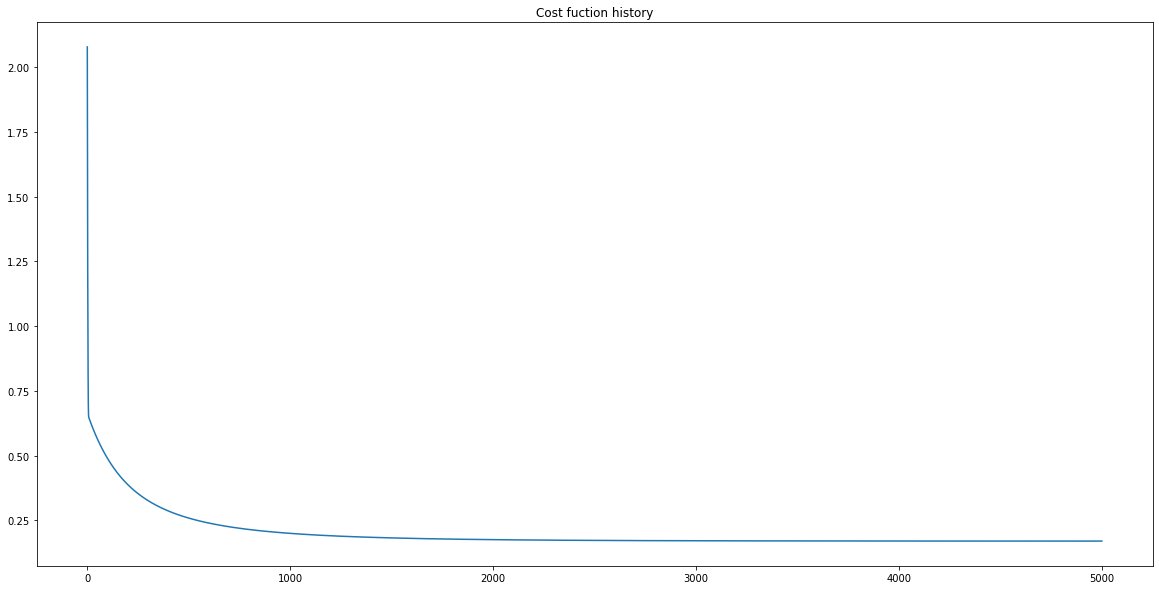

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(Xb, Y, learning_rate=0.1, epochs_num=5000, treshold=None, regularization='L2', alfa=0.001, trace_epochs_num=1000, show_plot=True, add_bias=False, init_weigths=w0.copy())

# XOR data

In [ ]:
N = 4
D = 2

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
XY = X[:,0] * X[:,1]
print(type(XY))

Y = np.array([0, 1, 1, 0])

Xb = np.hstack([np.ones((N,1)), XY.reshape(-1,1), X])
print('Xb:', Xb)

w0 = np.random.randn(D + 2)

<class 'numpy.ndarray'>
Xb: [[1. 0. 0. 0.]
 [1. 0. 0. 1.]
 [1. 0. 1. 0.]
 [1. 1. 1. 1.]]


Cost with no regularization will be used
Initial value for trained weigths: [ 0.26065332 -0.22428042  0.19606194  1.24150205]
Step 0. Starting point is [ 0.26065332 -0.22428042  0.19606194  1.24150205] and initial function value is 0.8009395442648379
Step 1000. At [-0.14922523 -1.45648896  0.20545305  0.78526365] function value is 0.5359523261209258
Step 2000. At [-0.13779705 -2.22741614  0.53749141  0.85848593] function value is 0.46443892256285546
Step 3000. At [-0.19665851 -2.85704724  0.83651663  1.01933378] function value is 0.41277371819381925
Step 4000. At [-0.28973402 -3.39858545  1.10696374  1.21413468] function value is 0.37141920938978
Step 5000. At [-0.39545746 -3.87901297  1.35435835  1.41892438] function value is 0.3368809666512387
Step 6000. At [-0.50345907 -4.313792    1.58218658  1.62209445] function value is 0.30747760127679946
Step 7000. At [-0.6088906  -4.71244608  1.79296185  1.81822784] function value is 0.2821732789628567
Step 8000. At [-0.70963404 -5.08127168  1

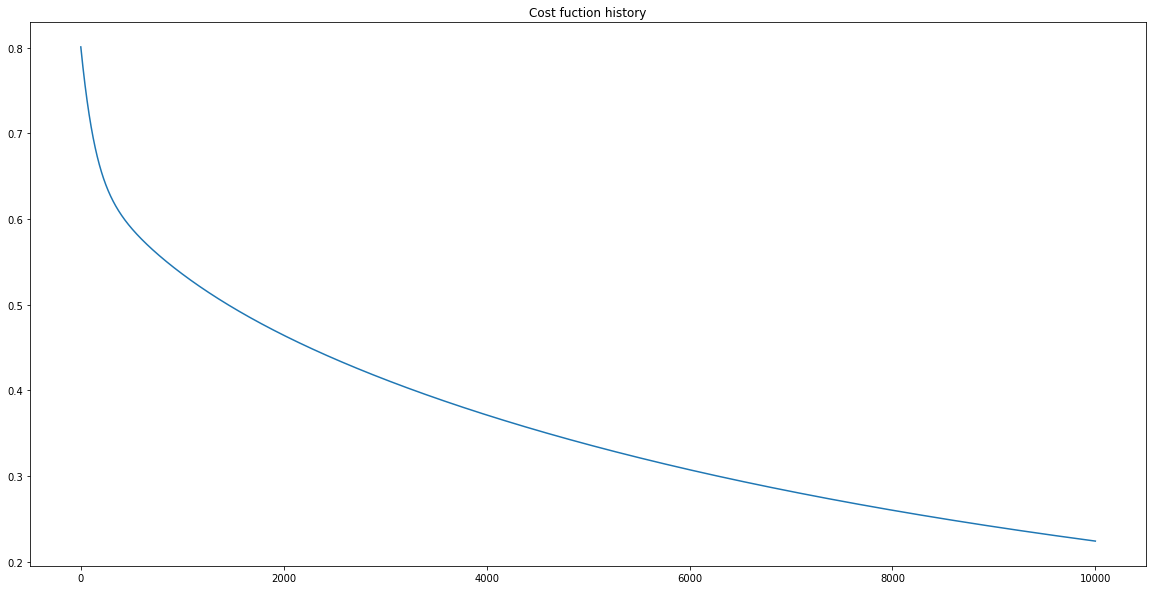

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(Xb, Y, learning_rate=0.01, epochs_num=10000, treshold=None, regularization=None, alfa=0.001, trace_epochs_num=1000, show_plot=True, add_bias=False, init_weigths=w0.copy())

Cost with L1 regularization will be used
Initial value for trained weigths: [ 0.26065332 -0.22428042  0.19606194  1.24150205]
Step 0. Starting point is [ 0.26065332 -0.22428042  0.19606194  1.24150205] and initial function value is 0.8393894988768482
Step 1000. At [ 3.81937710e-04 -1.06709858e+00  4.74002909e-04  4.28522312e-01] function value is 0.607893887969681
Step 2000. At [-5.23921679e-06 -1.40863665e+00  8.76613091e-02  3.18379684e-01] function value is 0.586934608289227
Step 3000. At [ 6.01345160e-04 -1.64945333e+00  2.04527826e-01  3.29104892e-01] function value is 0.5723383450019809
Step 4000. At [ 4.00793490e-04 -1.84942269e+00  2.97214399e-01  3.64822224e-01] function value is 0.5607736684747242
Step 5000. At [ 3.56338149e-04 -2.02054597e+00  3.68853662e-01  4.05761866e-01] function value is 0.5514833569049111
Step 6000. At [ 1.93806237e-04 -2.16803136e+00  4.25609199e-01  4.45878669e-01] function value is 0.5439331284335645
Step 7000. At [ 5.07647371e-05 -2.29552667e+00  4

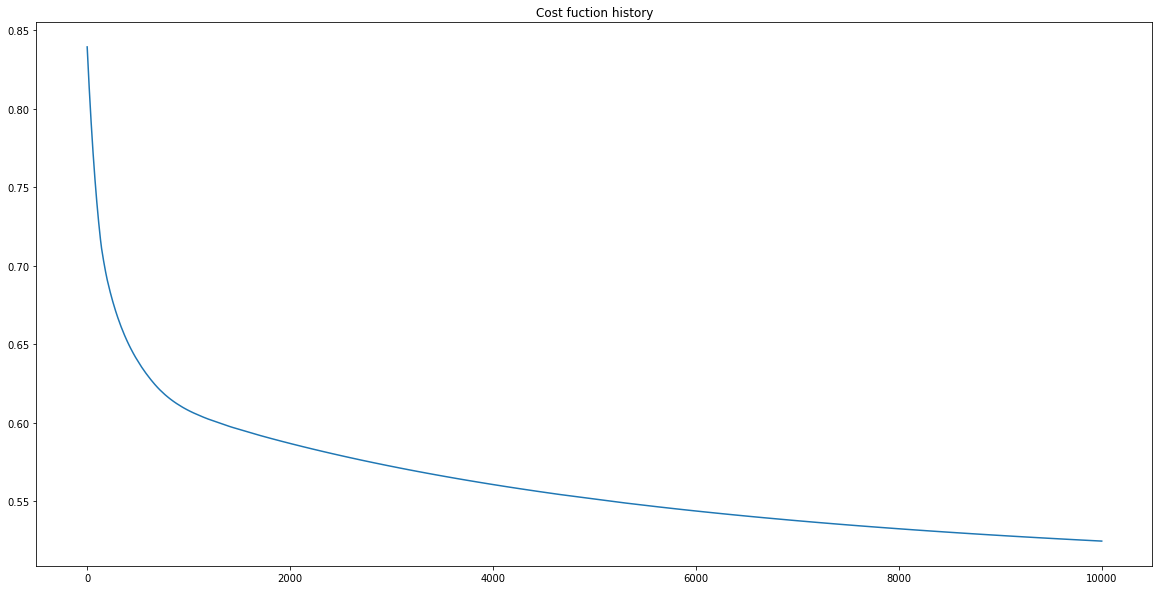

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(Xb, Y, learning_rate=0.01, epochs_num=10000, treshold=None, regularization='L1', alfa=0.02, trace_epochs_num=1000, show_plot=True, add_bias=False, init_weigths=w0.copy())

Cost with L2 regularization will be used
Initial value for trained weigths: [ 0.26065332 -0.22428042  0.19606194  1.24150205]
Step 0. Starting point is [ 0.26065332 -0.22428042  0.19606194  1.24150205] and initial function value is 0.8348997339462938
Step 1000. At [-0.08907277 -1.14267391  0.15848379  0.54439546] function value is 0.5984778990957486
Step 2000. At [-0.03463959 -1.47431246  0.32489023  0.465542  ] function value is 0.5830166658865077
Step 3000. At [-0.03001678 -1.64379552  0.41535049  0.46697235] function value is 0.5791892236301267
Step 4000. At [-0.03880719 -1.73600477  0.46608872  0.48511654] function value is 0.5780101262876143
Step 5000. At [-0.0484834  -1.78825992  0.4955451   0.50257572] function value is 0.5776015107128002
Step 6000. At [-0.05601273 -1.81872081  0.51302589  0.51562721] function value is 0.5774524545710124
Step 7000. At [-0.0612285  -1.83681565  0.52354114  0.52450439] function value is 0.5773969706160466
Step 8000. At [-0.06465279 -1.8476972   0.

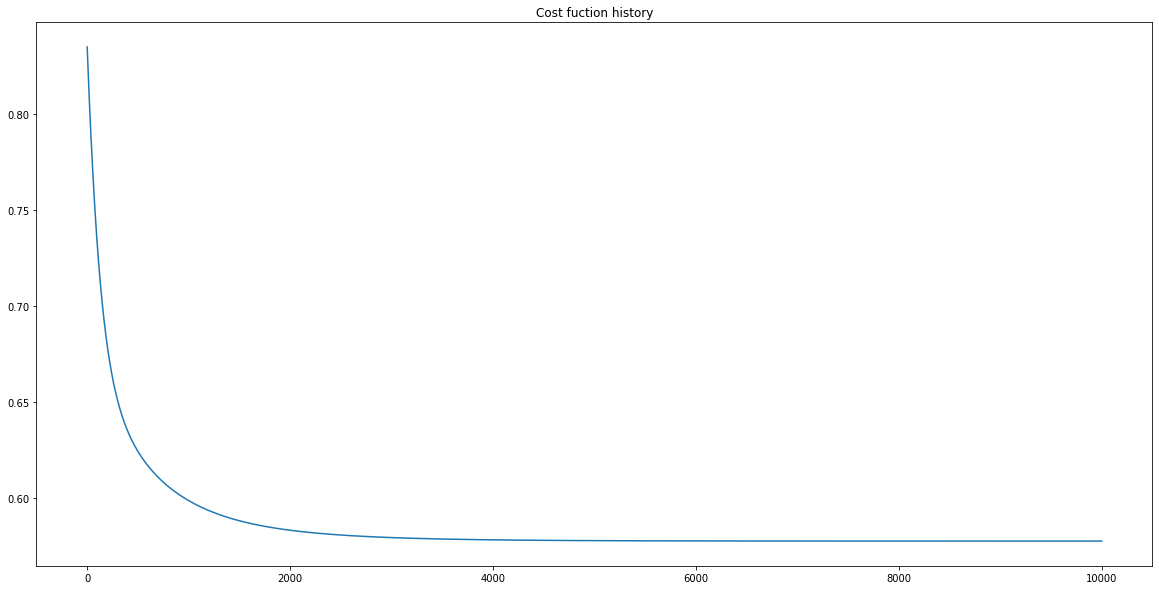

In [ ]:
model = BinaryLogisticRegressionModel()
w = model.fit(Xb, Y, learning_rate=0.01, epochs_num=10000, treshold=None, regularization='L2', alfa=0.02, trace_epochs_num=1000, show_plot=True, add_bias=False, init_weigths=w0.copy())